In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import networkx as nx
import holoviews as hv
from holoviews import opts
import networkx as nx

In [2]:
data = pd.read_csv('/Users/marissabergman/Documents/School/PhD/Journal Article/Coding/25.4.25 Updated Sample Set.csv')
data

,Title,Authors,Year,APP,BPP,PPP,Compensation,Guarantee of Non-Repetition,Rehabilitation,Restitution,Satisfaction,Source Title,Discipline,DOI,Unique Affiliations
0,"1.5 to stay alive: climate change, imperialism...","Sealey-Huggins, L.",2017,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,Third World Quarterly,Social Sciences,10.1080/01436597.2017.1368013,"University of Warwick, United Kingdom"
1,A Green New Deal Beyond the North: Both promis...,"Kolinjivadi, V.; Kothari, A.",2022,NaN,1.0,1.0,1.0,NaN,NaN,1.0,3.0,Routledge Handbook on the Green New Deal,Social Sciences,10.4324/9781003110880-16,"University of Antwerp, Belgium; National Law S..."
2,"A justice paradox: Climate change, small islan...","Burkett, M.",2015,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,International Environmental Law and the Global...,Law,10.1017/CBO9781107295414.021,"University of Hawai'i, United States"
3,A Minimal Capabilities-Based Account of Loss a...,"Garcia-Portela, L.",2024,NaN,NaN,NaN,1.0,2.0,1.0,NaN,3.0,Journal of Human Development and Capabilities,Social Sciences,10.1080/19452829.2024.2305388,"Erasmus University Rotterdam, Netherlands; Kar..."
4,A moral analysis of carbon majors' role in cli...,"Grasso, M.; Vladimirova, K.",2020,2.0,6.0,3.0,7.0,2.0,NaN,1.0,1.0,Environmental Values,Social Sciences,10.3197/096327119X15579936382626,"University of Milano-Bicocca, Italy; Universit..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,"Making climate finance: toward everyday, histo...","Kear, M.; Ponder, C.S.; Hilbrandt, H.",2024,NaN,NaN,1.0,2.0,NaN,2.0,NaN,NaN,City,Social Sciences,10.1080/13604813.2024.2400442,"University of Arizona, United States; Florida ..."
62,Land matters: how Indigenous land restitution ...,"Correia, J.E.",2024,NaN,NaN,2.0,7.0,NaN,NaN,6.0,NaN,Climate and Development,Social Sciences,10.1080/17565529.2024.2378027,"Colorado State University, United States"
63,"Epistemic silences, subversive politics: post-...","Perry, K.K.",2024,NaN,1.0,2.0,1.0,NaN,1.0,NaN,3.0,Climate and Development,Social Sciences,10.1080/17565529.2024.2370926,"University of California Los Angeles, United S..."
64,Reparations for Loss and Damage? The Cosmopoli...,"Vaha, M.",2024,1.0,3.0,6.0,5.0,2.0,NaN,3.0,2.0,International Political Theory,Social Sciences,10.1007/978-3-031-52243-7_6,"University of the South Pacific, Fiji"


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Title                        66 non-null     object 
 1   Authors                      66 non-null     object 
 2   Year                         66 non-null     int64  
 3   APP                          28 non-null     float64
 4   BPP                          41 non-null     float64
 5   PPP                          56 non-null     float64
 6   Compensation                 55 non-null     float64
 7   Guarantee of Non-Repetition  41 non-null     float64
 8   Rehabilitation               38 non-null     float64
 9   Restitution                  33 non-null     float64
 10  Satisfaction                 44 non-null     float64
 11  Source Title                 66 non-null     object 
 12  Discipline                   66 non-null     object 
 13  DOI                   

In [4]:
print(data.isnull().sum())

Title                           0
Authors                         0
Year                            0
APP                            38
BPP                            25
PPP                            10
Compensation                   11
Guarantee of Non-Repetition    25
Rehabilitation                 28
Restitution                    33
Satisfaction                   22
Source Title                    0
Discipline                      0
DOI                             3
Unique Affiliations             1
dtype: int64


In [5]:
print(data.describe())

              Year        APP        BPP        PPP  Compensation  \
count    66.000000  28.000000  41.000000  56.000000     55.000000   
mean   2020.863636   1.964286   2.634146   2.625000      3.527273   
std       3.559976   1.426785   1.742930   1.921765      2.767902   
min    2009.000000   1.000000   1.000000   1.000000      1.000000   
25%    2019.000000   1.000000   1.000000   1.000000      1.000000   
50%    2022.500000   1.000000   2.000000   2.000000      3.000000   
75%    2023.000000   2.250000   4.000000   3.000000      5.000000   
max    2024.000000   6.000000   7.000000   9.000000     14.000000   

       Guarantee of Non-Repetition  Rehabilitation  Restitution  Satisfaction  
count                    41.000000       38.000000    33.000000     44.000000  
mean                      1.926829        1.868421     2.030303      2.136364  
std                       1.438580        1.017975     1.510067      1.153174  
min                       1.000000        1.000000     1.0

In [6]:
authors_series = data['Authors'].str.split('; ').explode()
authors_series

0     Sealey-Huggins, L.
1        Kolinjivadi, V.
1            Kothari, A.
2            Burkett, M.
3     Garcia-Portela, L.
             ...        
61         Hilbrandt, H.
62         Correia, J.E.
63           Perry, K.K.
64             Vaha, M. 
65              Heri, C.
Name: Authors, Length: 113, dtype: object

In [7]:
top_authors = authors_series.value_counts().head(10)
top_authors

Grasso, M.       4
Bond, P.         3
Mayer, B.        3
Shinde, M.       2
Perry, K.K.      2
Burkett, M.      2
Mintz-Woo, K.    2
Junker, K.W.     2
Munster, S.      2
Dehm, J.         2
Name: Authors, dtype: int64

In [8]:
affiliations_series = data['Unique Affiliations'].str.split('; ').explode()
affiliations_series = affiliations_series.str.strip()
top_affiliations = affiliations_series.value_counts().head(10)
top_affiliations

University of Milano-Bicocca, Italy                       4
University of Hawai'i, United States                      3
University of the South Pacific, Fiji                     2
University of Cologne, Germany                            2
International Institute of Social Studies, Netherlands    2
National University of Singapore, Singapore               2
University of Kwazulu-Natal, South Africa                 2
La Trobe University, Australia                            2
Arizona State University, United States                   2
University of California Los Angeles, United States       2
Name: Unique Affiliations, dtype: int64

In [9]:
unique_affiliations = affiliations_series.drop_duplicates().sort_values()
unique_affiliations

59           American University, United States
6       Arizona State University, United States
60           Association Tournesol, Switzerland
26    Australian National University, Australia
22    Autonomous University of Barcelona, Spain
                        ...                    
35        University of the South Pacific, Fiji
58       Walter Sisulu University, South Africa
47              Williams College, United States
10                      Wuhan University, China
44                                          NaN
Name: Unique Affiliations, Length: 88, dtype: object

In [10]:
num_unique_affiliations = affiliations_series.nunique()
print(f"Number of unique affiliations: {num_unique_affiliations}")

Number of unique affiliations: 87


In [11]:
unique_affiliations.to_csv("unique_affiliations_list.csv", index=False, header=["Affiliation"])

In [12]:
source_counts = data['Source Title'].value_counts()
source_counts

Environmental Values                                                   3
Climate Policy                                                         3
Climate and Development                                                2
Environmental Policy and Law                                           2
Development and Change                                                 2
Review of African Political Economy                                    2
Third World Quarterly                                                  1
Chinese Journal of International Law                                   1
Geoforum                                                               1
Climatic Change                                                        1
Dickinson Law Review                                                   1
California Law Review                                                  1
Philosophies                                                           1
One Earth                                          

In [13]:
source_counts.to_csv("source_title_counts.csv", header=["Count"])

In [14]:
legal_journals = data[data['Source Title'].str.contains('law|legal', case=False, na=False)]
print(legal_journals['Source Title'].head())


2     International Environmental Law and the Global...
5                          Environmental Policy and Law
10                  Asian Journal OF International Law 
11                                  Griffith Law Review
16               Melbourne Journal of International Law
Name: Source Title, dtype: object


In [15]:
legal_journal_list = legal_journals['Source Title'].tolist()
legal_journal_list

['International Environmental Law and the Global South',
 'Environmental Policy and Law',
 'Asian Journal OF International Law ',
 'Griffith Law Review',
 'Melbourne Journal of International Law',
 'Environmental Policy and Law',
 'Transnational Environmental Law',
 'American Journal of International Law Unbound',
 'Climate Law',
 'Carbon and Climate Law Review',
 'California Law Review',
 'Chinese Journal of International Law',
 'Dickinson Law Review',
 'Review of European, Comparative and International Environmental Law',
 'Journal of International Economic Law',
 'European Convention on Human Rights Law Review']

In [16]:
num_legal = len(legal_journals)
num_legal

16

In [17]:
len(data)

66

In [18]:
legal_percentage = (num_legal / len(data)) * 100
legal_percentage

24.242424242424242

<Figure size 1000x600 with 0 Axes>

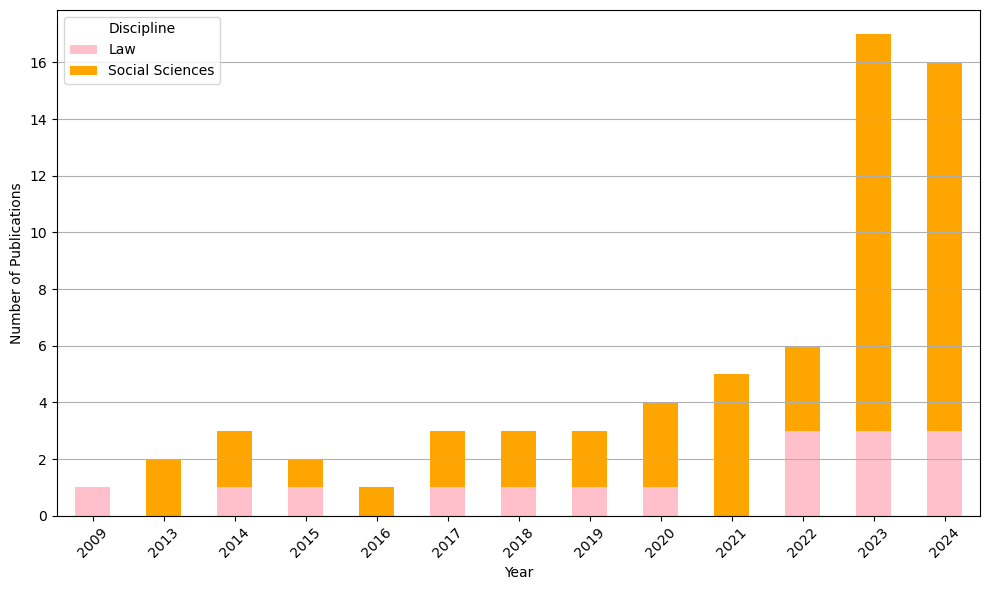

In [19]:
pub_trends_by_discipline = data.groupby(['Year', 'Discipline']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
pub_trends_by_discipline.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['pink', 'orange']
)

plt.title('')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.legend(title='Discipline')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('publicationtrendsdisciplines.png', dpi=300, bbox_inches='tight')

plt.show()

In [20]:
burden_columns = ['APP', 'BPP', 'PPP']
reparation_columns = ['Compensation', 'Guarantee of Non-Repetition', 'Rehabilitation', 'Restitution', 'Satisfaction']
all_concept_columns = burden_columns + reparation_columns

def get_presence_percentages(df):
    binary = df[all_concept_columns].applymap(lambda x: 1 if x > 0 else 0)
    return (binary.sum() / len(df)) * 100

overall_pct = get_presence_percentages(data)
social_pct = get_presence_percentages(data[data['Discipline'] == 'Social Sciences'])
law_pct = get_presence_percentages(data[data['Discipline'] == 'Law'])

comparison_table = pd.DataFrame({
    'All Articles (%)': overall_pct,
    'Social Sciences (%)': social_pct,
    'Law (%)': law_pct
})

comparison_table

,All Articles (%),Social Sciences (%),Law (%)
APP,42.424242,42.0,43.75
BPP,62.121212,62.0,62.50
PPP,84.848485,84.0,87.50
Compensation,83.333333,84.0,81.25
Guarantee of Non-Repetition,62.121212,64.0,56.25
Rehabilitation,57.575758,56.0,62.50
Restitution,50.000000,48.0,56.25
Satisfaction,66.666667,66.0,68.75


In [21]:
all_concept_columns = burden_columns + reparation_columns

binary_presence = data[all_concept_columns].applymap(lambda x: 1 if x > 0 else 0)
binary_presence['Year'] = data['Year']  

yearly_percentages = binary_presence.groupby('Year').mean() * 100

yearly_percentages.round(2)

,APP,BPP,PPP,Compensation,Guarantee of Non-Repetition,Rehabilitation,Restitution,Satisfaction
Year,,,,,,,,
2009,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
2013,0.00,50.00,50.00,100.00,100.00,100.00,50.00,100.00
2014,66.67,66.67,100.00,100.00,66.67,66.67,66.67,66.67
2015,0.00,50.00,100.00,50.00,50.00,0.00,50.00,50.00
2016,100.00,100.00,100.00,100.00,100.00,100.00,0.00,100.00
2017,33.33,66.67,66.67,66.67,100.00,33.33,33.33,100.00
2018,66.67,66.67,100.00,66.67,33.33,66.67,33.33,66.67
2019,33.33,33.33,100.00,100.00,66.67,33.33,66.67,66.67
2020,50.00,50.00,75.00,75.00,50.00,0.00,50.00,50.00


In [22]:
burden_columns = ['APP', 'BPP', 'PPP']
reparation_columns = ['Compensation', 'Guarantee of Non-Repetition', 'Rehabilitation', 'Restitution', 'Satisfaction']
all_columns = burden_columns + reparation_columns

binary_presence = data[all_columns].applymap(lambda x: 1 if x > 0 else 0)

engaged_with_all = binary_presence.sum(axis=1) == len(all_columns)

num_engaged = engaged_with_all.sum()
total_pubs = len(data)
percentage_engaged = (num_engaged / total_pubs) * 100

print(f"Publications engaging with ALL 3 burdens + ALL 5 reparations: {num_engaged} out of {total_pubs} ({percentage_engaged:.2f}%)")

Publications engaging with ALL 3 burdens + ALL 5 reparations: 7 out of 66 (10.61%)


In [23]:
burdens = ['APP', 'BPP', 'PPP']
reparations = ['Compensation', 'Guarantee of Non-Repetition', 'Rehabilitation', 'Restitution', 'Satisfaction']

data_binary = data.copy()
data_binary[burdens + reparations] = data[burdens + reparations].notnull().astype(int)

co_occurrence_matrix = data_binary[burdens].T.dot(data_binary[reparations])

total_publications = len(data)

co_occurrence_percentage = (co_occurrence_matrix / total_publications) * 100
co_occurrence_percentage

,Compensation,Guarantee of Non-Repetition,Rehabilitation,Restitution,Satisfaction
APP,34.848485,31.818182,30.303030,24.242424,30.303030
BPP,48.484848,42.424242,39.393939,28.787879,39.393939
PPP,74.242424,53.030303,53.030303,45.454545,56.060606


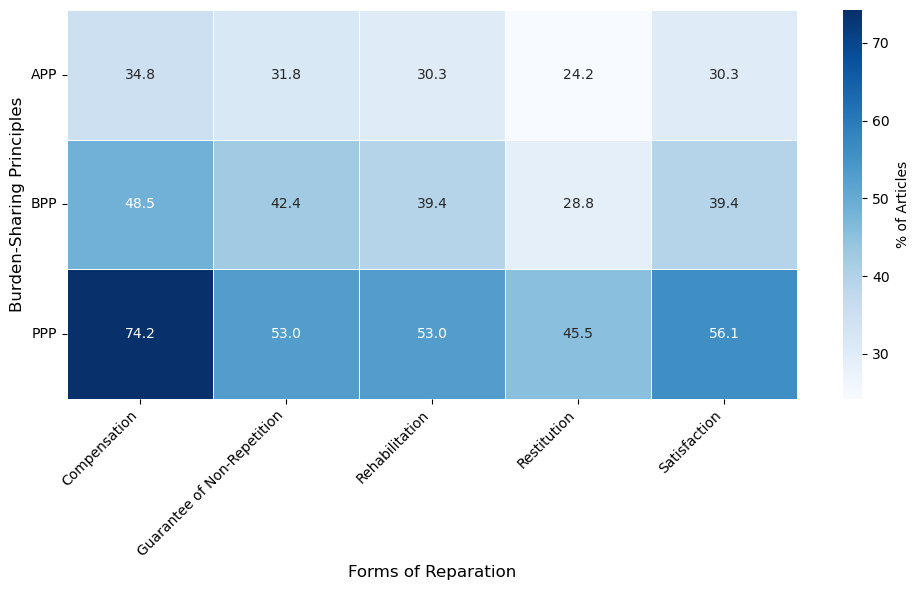

In [24]:
plt.figure(figsize=(10, 6))

sns.heatmap(
    co_occurrence_percentage,
    annot=True,               
    fmt=".1f",                
    cmap="Blues",             
    cbar_kws={'label': '% of Articles'},  
    linewidths=0.5,           
    linecolor='white'         
)

plt.title("", fontsize=14)
plt.xlabel("Forms of Reparation", fontsize=12)
plt.ylabel("Burden-Sharing Principles", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.savefig('blueheatmap.png', dpi=300, bbox_inches='tight')

plt.show()

In [25]:
burdens = ['APP', 'BPP', 'PPP']
reparations = ['Compensation', 'Guarantee of Non-Repetition', 'Rehabilitation', 'Restitution', 'Satisfaction']

data_filled = data[burdens + reparations].fillna(0)

weighted_co_occurrence_matrix = data_filled[burdens].T.dot(data_filled[reparations])

total_weighted_occurrences = weighted_co_occurrence_matrix.sum().sum()

weighted_co_occurrence_percentage = (weighted_co_occurrence_matrix / total_weighted_occurrences) * 100
weighted_co_occurrence_percentage

,Compensation,Guarantee of Non-Repetition,Rehabilitation,Restitution,Satisfaction
APP,6.933842,2.735369,2.449109,1.876590,3.689567
BPP,14.631043,4.643766,4.707379,3.117048,5.852417
PPP,21.819338,6.870229,6.743003,6.170483,7.760814


In [26]:
burdens = ['APP', 'BPP', 'PPP']
reparations = ['Compensation', 'Guarantee of Non-Repetition', 'Rehabilitation', 'Restitution', 'Satisfaction']

law_df = data[data['Source Title'].str.contains('law|legal', case=False, na=False)]
social_df = data[~data.index.isin(law_df.index)]

def compute_binary_co_occurrence(df):
    df_binary = df.copy()
    df_binary[burdens + reparations] = df_binary[burdens + reparations].notnull().astype(int)

    co_matrix = df_binary[burdens].T.dot(df_binary[reparations])

    percentage_matrix = (co_matrix / len(df_binary)) * 100
    return percentage_matrix

law_co_occurrence = compute_binary_co_occurrence(law_df)
social_co_occurrence = compute_binary_co_occurrence(social_df)

print("Legal Journals Co-Occurrence Matrix:")
print(law_co_occurrence.round(1))

print("\nSocial Sciences Co-Occurrence Matrix:")
print(social_co_occurrence.round(1))

Legal Journals Co-Occurrence Matrix:
     Compensation  Guarantee of Non-Repetition  Rehabilitation  Restitution  \
APP          43.8                         31.2            43.8         31.2   
BPP          50.0                         43.8            50.0         31.2   
PPP          81.2                         50.0            62.5         56.2   

     Satisfaction  
APP          43.8  
BPP          43.8  
PPP          68.8  

Social Sciences Co-Occurrence Matrix:
     Compensation  Guarantee of Non-Repetition  Rehabilitation  Restitution  \
APP          32.0                         32.0            26.0         22.0   
BPP          48.0                         42.0            36.0         28.0   
PPP          72.0                         54.0            50.0         42.0   

     Satisfaction  
APP          26.0  
BPP          38.0  
PPP          52.0  


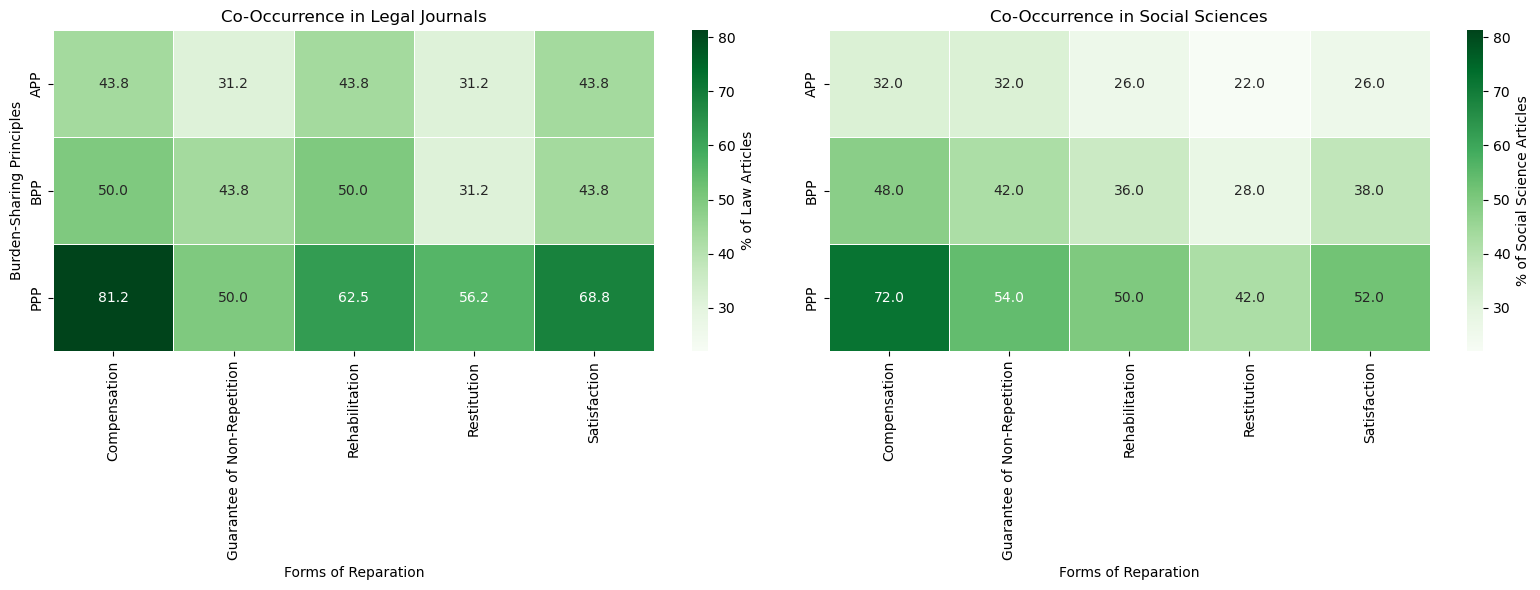

In [27]:
vmin = min(law_co_occurrence.min().min(), social_co_occurrence.min().min())
vmax = max(law_co_occurrence.max().max(), social_co_occurrence.max().max())

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(
    law_co_occurrence,
    annot=True,                        
    fmt=".1f",                         
    cmap="Greens",                      
    cbar_kws={'label': '% of Law Articles'},  
    ax=axes[0],                       
    linewidths=0.5,
    linecolor='white',
    vmin=vmin,
    vmax=vmax
)
axes[0].set_title("Co-Occurrence in Legal Journals")
axes[0].set_xlabel("Forms of Reparation")
axes[0].set_ylabel("Burden-Sharing Principles")

sns.heatmap(
    social_co_occurrence,
    annot=True,
    fmt=".1f",
    cmap="Greens",
    cbar_kws={'label': '% of Social Science Articles'},
    ax=axes[1],
    linewidths=0.5,
    linecolor='white',
    vmin=vmin,
    vmax=vmax
)
axes[1].set_title("Co-Occurrence in Social Sciences")
axes[1].set_xlabel("Forms of Reparation")
axes[1].set_ylabel("")  

plt.tight_layout()

plt.savefig('compareheatmaps.png', dpi=300, bbox_inches='tight')

plt.show()

In [28]:
burdens = ['APP', 'BPP', 'PPP']
reparations = ['Compensation', 'Guarantee of Non-Repetition',
               'Rehabilitation', 'Restitution', 'Satisfaction']

data_filled = data[burdens + reparations].fillna(0)

actual_co_occurrence_matrix = data_filled[burdens].T.dot(data_filled[reparations])

actual_co_occurrence_matrix

,Compensation,Guarantee of Non-Repetition,Rehabilitation,Restitution,Satisfaction
APP,218.0,86.0,77.0,59.0,116.0
BPP,460.0,146.0,148.0,98.0,184.0
PPP,686.0,216.0,212.0,194.0,244.0


In [29]:
burdens = ['APP', 'BPP', 'PPP']
reparations = ['Compensation', 'Guarantee of Non-Repetition',
                    'Rehabilitation', 'Restitution', 'Satisfaction']

data_filled = data[burdens + reparations].fillna(0)

reparations_binary = data_filled[reparations] > 0

co_occurrence_counts = data_filled[burdens].T.dot(reparations_binary)

print(co_occurrence_counts)

     Compensation  Guarantee of Non-Repetition  Rehabilitation  Restitution  \
APP          45.0                         39.0            40.0         32.0   
BPP          91.0                         76.0            74.0         57.0   
PPP         135.0                        104.0           105.0         94.0   

     Satisfaction  
APP          43.0  
BPP          78.0  
PPP         101.0  


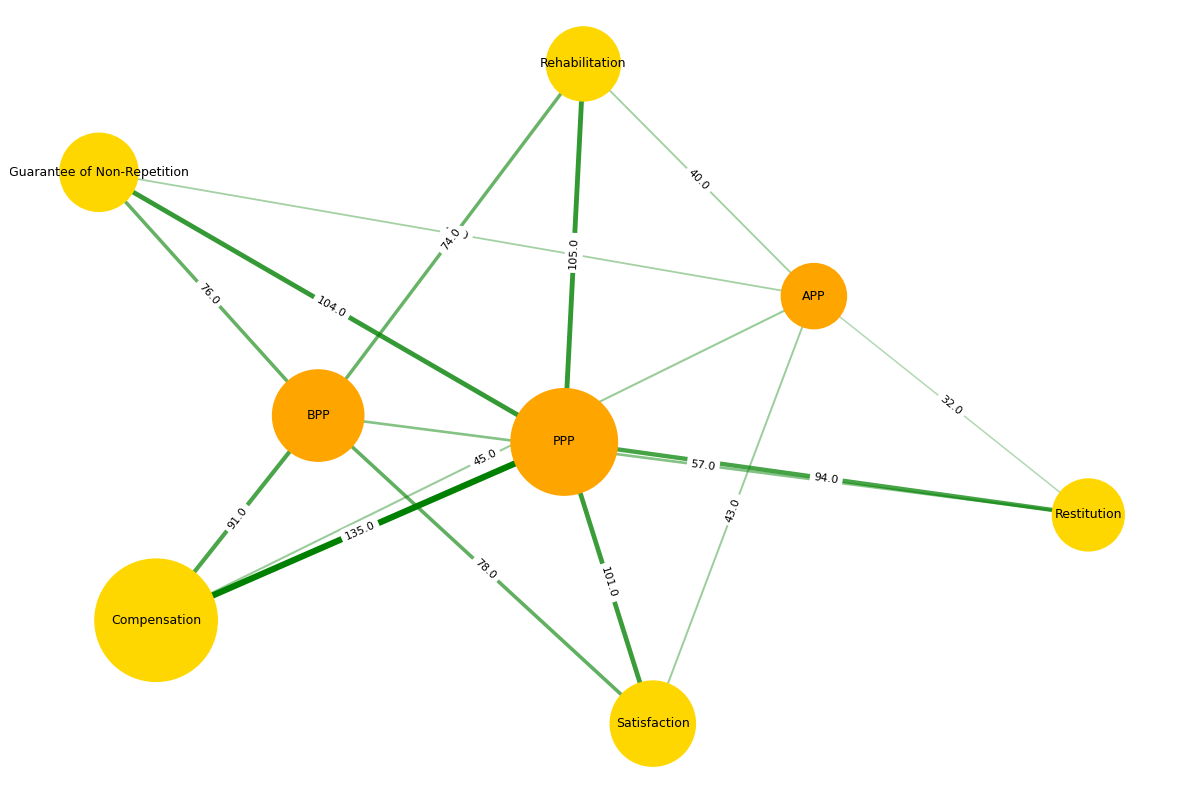

In [30]:
burdens = ['APP', 'BPP', 'PPP']
reparations = ['Compensation', 'Guarantee of Non-Repetition',
                    'Rehabilitation', 'Restitution', 'Satisfaction']

G = nx.Graph()

burden_columns = ['APP', 'BPP', 'PPP']
reparation_columns = ['Compensation', 'Guarantee of Non-Repetition', 'Rehabilitation', 'Restitution', 'Satisfaction']
all_concept_columns = burden_columns + reparation_columns
binary_presence = data[all_concept_columns].applymap(lambda x: 1 if x > 0 else 0)
concept_percentages = (binary_presence.sum() / len(data)) * 100

for node in burdens + reparations:
    total_mentions = data_filled[node].sum()
    G.add_node(node, size=total_mentions)

for burden in burdens:
    for reparation in reparations:
        count = co_occurrence_counts.loc[burden, reparation]
        if count > 0:
            G.add_edge(burden, reparation, weight=count)

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)

node_sizes = [G.nodes[n]['size'] * 40 for n in G.nodes()]

max_weight = max([d['weight'] for _, _, d in G.edges(data=True)])
edge_widths = [G[u][v]['weight'] / 30 for u, v in G.edges()]
edge_colors = 'green'
edge_alphas = [0.1 + (G[u][v]['weight'] / max_weight) * 0.9 for u, v in G.edges()]

node_colors = []
for node in G.nodes():
    if node in burdens:
        node_colors.append('orange')
    else:
        node_colors.append('gold') 
        
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors)

for (u, v, d), alpha in zip(G.edges(data=True), edge_alphas):
    nx.draw_networkx_edges(G, pos, edgelist=[(u, v)],
                           width=d['weight'] / 30,
                           edge_color=edge_colors,
                           alpha=alpha)

nx.draw_networkx_labels(G, pos, font_size=9, font_color='black')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title('')
plt.axis('off')
plt.tight_layout()

plt.savefig('nodemap.png', dpi=300, bbox_inches='tight')

plt.show()

In [31]:
burden_columns = ['APP', 'BPP', 'PPP']
binary_presence = data[burden_columns].applymap(lambda x: 1 if x > 0 else 0)
burden_percentages = (binary_presence.sum() / len(data)) * 100
print(burden_percentages)

APP    42.424242
BPP    62.121212
PPP    84.848485
dtype: float64


In [32]:
burdens = ['APP', 'BPP', 'PPP']

burden_binary = data[burdens].notnull().astype(int)

directional_counts = pd.DataFrame(
    np.zeros((len(burdens), len(burdens))),
    index=burdens,
    columns=burdens
)

for f1 in burdens:
    for f2 in burdens:
        if f1 != f2:
            directional_counts.loc[f1, f2] = ((burden_binary[f1] == 1) & (burden_binary[f2] == 1)).sum()

normalized_directional = directional_counts.div(burden_binary.sum(axis=0), axis=1)

normalized_directional = normalized_directional.round(2)

print(normalized_directional)


      APP   BPP   PPP
APP  0.00  0.59  0.50
BPP  0.86  0.00  0.66
PPP  1.00  0.90  0.00


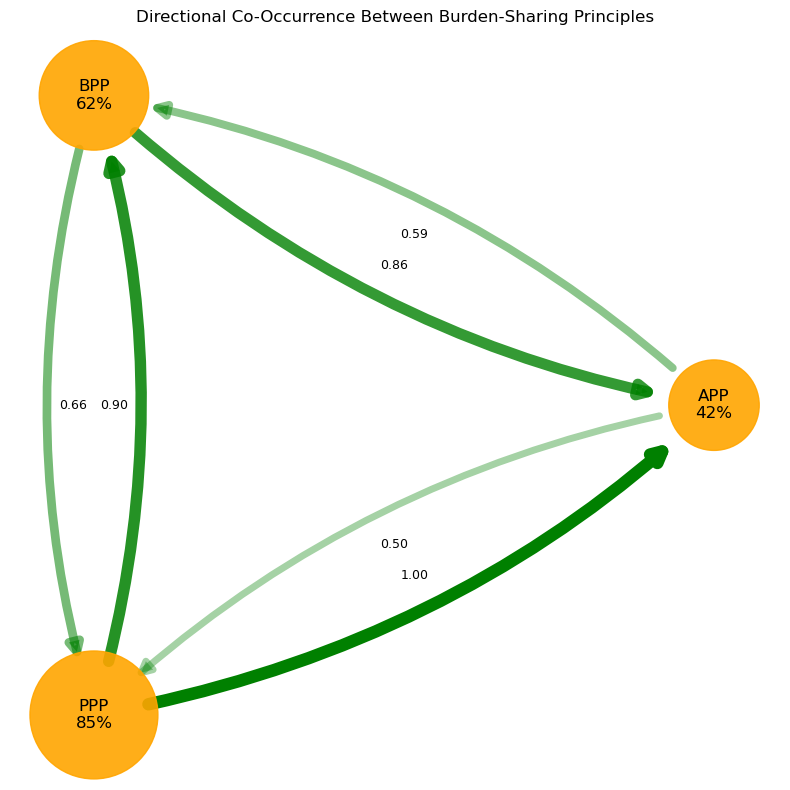

In [33]:
burdens = ['APP', 'BPP', 'PPP']
G = nx.DiGraph()

G.add_nodes_from(burdens)

burden_columns = ['APP', 'BPP', 'PPP']
binary_presence = data[burden_columns].applymap(lambda x: 1 if x > 0 else 0)
burden_percentages = (binary_presence.sum() / len(data)) * 100

for source in burdens:
    for target in burdens:
        if source != target:
            weight = normalized_directional.loc[source, target]
            if weight > 0:
                G.add_edge(source, target, weight=weight)

edges, weights = zip(*nx.get_edge_attributes(G, 'weight').items())
max_weight = max(weights)

pos = nx.circular_layout(G)

plt.figure(figsize=(8, 8))
node_sizes = [burden_percentages[n] * 100 for n in G.nodes()]  
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='orange', alpha=0.9)
node_labels = {
    n: f"{n}\n{burden_percentages[n]:.0f}%" for n in G.nodes()
}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=12, font_color='black')

for (u, v), weight in zip(edges, weights):
    alpha = (weight / max_weight) ** 1.5
    width = 1 + 8 * weight
    nx.draw_networkx_edges(
        G, pos, edgelist=[(u, v)],
        width=width,
        edge_color='green',
        alpha=alpha,
        connectionstyle='arc3,rad=0.15',
        arrows=True,
        arrowstyle='-|>',
        arrowsize=20,
        min_source_margin=40,            
        min_target_margin=40
    )

for (u, v), weight in zip(edges, weights):
    mid_x = (pos[u][0] + pos[v][0]) / 2
    mid_y = (pos[u][1] + pos[v][1]) / 2
    offset = 0.05
    dx = pos[v][0] - pos[u][0]
    dy = pos[v][1] - pos[u][1]
    norm = (dx**2 + dy**2)**0.5
    label_x = mid_x + offset * dy / norm
    label_y = mid_y - offset * dx / norm
    plt.text(label_x, label_y, f"{weight:.2f}", fontsize=9, ha='center', va='center',
             bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

plt.title('Directional Co-Occurrence Between Burden-Sharing Principles')
plt.axis('off')
plt.tight_layout()

plt.savefig('burdendirectional.png', dpi=300, bbox_inches='tight')

plt.show()

In [34]:
reparation_columns = ['Compensation', 'Guarantee of Non-Repetition', 'Rehabilitation', 'Restitution', 'Satisfaction']
binary_presence = data[reparation_columns].applymap(lambda x: 1 if x > 0 else 0)
reparation_percentages = (binary_presence.sum() / len(data)) * 100
print(reparation_percentages)

Compensation                   83.333333
Guarantee of Non-Repetition    62.121212
Rehabilitation                 57.575758
Restitution                    50.000000
Satisfaction                   66.666667
dtype: float64


In [35]:
reparations = ['Compensation', 'Guarantee of Non-Repetition', 'Rehabilitation', 'Restitution', 'Satisfaction']

binary_data_frameworks = data[reparations].applymap(lambda x: 1 if x > 0 else 0)

directional_co_occurrence_matrix = pd.DataFrame(
    np.zeros((len(reparations), len(reparations))),
    index=reparations, columns=reparations)

for framework1 in reparations:
    for framework2 in reparations:
        if framework1 != framework2:
            directional_co_occurrence_matrix.loc[framework1, framework2] = np.sum(
                (binary_data_frameworks[framework1] == 1) & (binary_data_frameworks[framework2] == 1))

normalized_directional_co_occurrence_matrix = directional_co_occurrence_matrix.div(binary_data_frameworks.sum(axis=0), axis=1)
normalized_directional_co_occurrence_matrix

,Compensation,Guarantee of Non-Repetition,Rehabilitation,Restitution,Satisfaction
Compensation,0.000000,0.878049,0.947368,0.969697,0.954545
Guarantee of Non-Repetition,0.654545,0.000000,0.736842,0.666667,0.704545
Rehabilitation,0.654545,0.682927,0.000000,0.696970,0.704545
Restitution,0.581818,0.536585,0.605263,0.000000,0.613636
Satisfaction,0.763636,0.756098,0.815789,0.818182,0.000000


In [36]:
reparations = ['Compensation', 'Guarantee of Non-Repetition', 'Rehabilitation', 'Restitution', 'Satisfaction']

co_occurrence_matrix = data[reparations].notnull().astype(int).T.dot(data[reparations].notnull().astype(int))

individual_occurrences = data[reparations].notnull().sum()

co_occurrence_ratio = pd.DataFrame(index=reparations, columns=reparations)

for form1 in reparations:
    for form2 in reparations:
        if form1 != form2:
            co_occurrence_ratio.loc[form1, form2] = co_occurrence_matrix.loc[form1, form2] / np.sqrt(
                individual_occurrences[form1] * individual_occurrences[form2]
            )
        else:
            co_occurrence_ratio.loc[form1, form2] = np.nan  

co_occurrence_flat = co_occurrence_ratio.unstack().reset_index()
co_occurrence_flat.columns = ['Form1', 'Form2', 'Ratio']

co_occurrence_flat = co_occurrence_flat.dropna()
co_occurrence_flat = co_occurrence_flat[co_occurrence_flat['Form1'] != co_occurrence_flat['Form2']]
co_occurrence_flat['Pair'] = co_occurrence_flat.apply(lambda row: tuple(sorted([row['Form1'], row['Form2']])), axis=1)
co_occurrence_flat = co_occurrence_flat.drop_duplicates(subset='Pair').sort_values(by='Ratio', ascending=False).reset_index(drop=True)
co_occurrence_flat

,Form1,Form2,Ratio,Pair
0,Compensation,Satisfaction,0.853771,"(Compensation, Satisfaction)"
1,Compensation,Rehabilitation,0.787462,"(Compensation, Rehabilitation)"
2,Rehabilitation,Satisfaction,0.75813,"(Rehabilitation, Satisfaction)"
3,Compensation,Guarantee of Non-Repetition,0.758105,"(Compensation, Guarantee of Non-Repetition)"
4,Compensation,Restitution,0.751124,"(Compensation, Restitution)"
5,Guarantee of Non-Repetition,Satisfaction,0.729866,"(Guarantee of Non-Repetition, Satisfaction)"
6,Guarantee of Non-Repetition,Rehabilitation,0.709372,"(Guarantee of Non-Repetition, Rehabilitation)"
7,Restitution,Satisfaction,0.708566,"(Restitution, Satisfaction)"
8,Rehabilitation,Restitution,0.6495,"(Rehabilitation, Restitution)"
9,Guarantee of Non-Repetition,Restitution,0.5981,"(Guarantee of Non-Repetition, Restitution)"


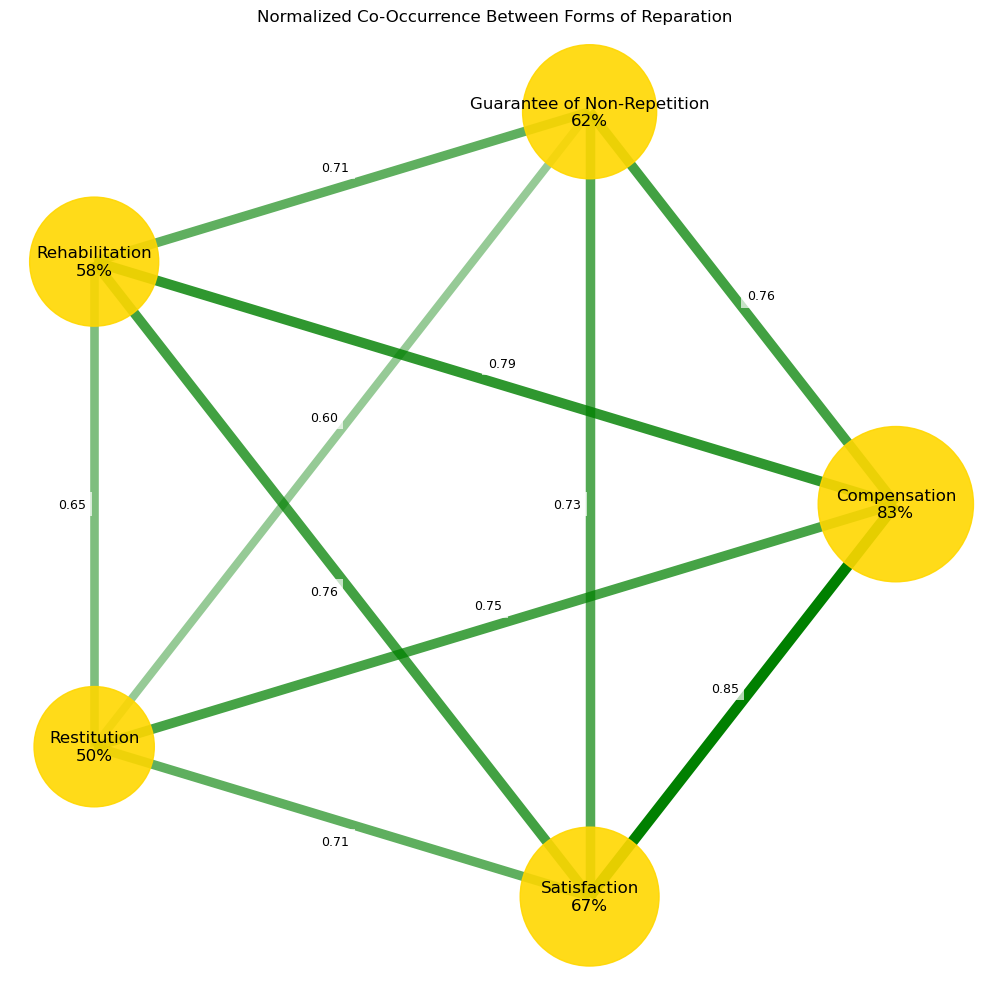

In [37]:
reparations = ['Compensation', 'Guarantee of Non-Repetition', 'Rehabilitation', 'Restitution', 'Satisfaction']

reparation_columns = ['Compensation', 'Guarantee of Non-Repetition', 'Rehabilitation', 'Restitution', 'Satisfaction']
binary_presence = data[reparation_columns].applymap(lambda x: 1 if x > 0 else 0)
reparation_percentages = (binary_presence.sum() / len(data)) * 100

G = nx.Graph()

for form in reparations:
    G.add_node(form, size=reparation_percentages[form])

for i in range(len(reparations)):
    for j in range(i + 1, len(reparations)):
        form1 = reparations[i]
        form2 = reparations[j]
        weight = co_occurrence_ratio.loc[form1, form2]
        if pd.notnull(weight):
            G.add_edge(form1, form2, weight=weight)

pos = nx.circular_layout(G)
node_sizes = [G.nodes[n]['size'] * 150 for n in G.nodes()]

plt.figure(figsize=(10, 10))
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='gold', alpha=0.9)
node_labels = {
    n: f"{n}\n{reparation_percentages[n]:.0f}%" for n in G.nodes()
}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=12, font_color='black')

# Edges and labels
edges = G.edges(data=True)
weights = [d['weight'] for _, _, d in edges]
max_weight = max(weights)

for (u, v, d) in edges:
    weight = d['weight']
    alpha = (weight / max_weight) ** 2.5  
    width = 1 + 8 * weight               

    nx.draw_networkx_edges(
        G, pos, edgelist=[(u, v)],
        width=width,
        edge_color='green',
        alpha=alpha
    )

    mid_x = (pos[u][0] + pos[v][0]) / 2
    mid_y = (pos[u][1] + pos[v][1]) / 2
    offset = 0.05
    dx = pos[v][0] - pos[u][0]
    dy = pos[v][1] - pos[u][1]
    norm = (dx**2 + dy**2)**0.5
    label_x = mid_x + offset * dy / norm
    label_y = mid_y - offset * dx / norm
    plt.text(label_x, label_y, f"{weight:.2f}", fontsize=9,
             ha='center', va='center',
             bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

plt.title('Normalized Co-Occurrence Between Forms of Reparation')
plt.axis('off')
plt.tight_layout()

plt.savefig("reparations_chord_diagram.png", dpi=300, bbox_inches='tight')

plt.show()